# ***Problem Statement***
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:



As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.



# **Data**
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).



In [164]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [165]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
df = pd.read_csv('/content/Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [168]:
df.shape

(9240, 37)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [170]:
# Check for duplicates in prospect ID 
sum(df.duplicated(subset = 'Prospect ID')) == 0

True

In [171]:
# Check for duplicates in Lead number
sum(df.duplicated(subset = 'Lead Number')) == 0

True

No duplicate values in Prospect ID and Lead Number

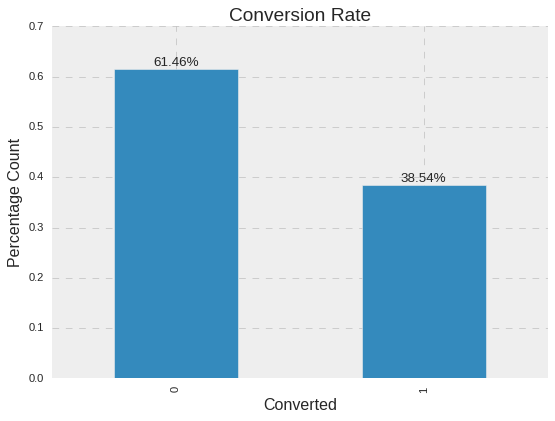

In [172]:
# Lets check lead conversion
plt.style.use('bmh') 
conversion_counts = df.Converted.value_counts(normalize=True)
conversion_counts.plot.bar()

plt.xlabel('Converted')
plt.ylabel('Percentage Count')
plt.title('Conversion Rate')

# Annotate percentages on each bar
for i, count in enumerate(conversion_counts):
    percentage = f'{count * 100:.2f}%'
    plt.text(i, count, percentage, ha='center', va='bottom')

plt.show()

Conversion rate is 38.54%

# Exploratory Data Analysis

**Data Cleaning**

In [173]:
# Replacing all 'select' values with NaN
df = df.replace('select', np.nan)

In [174]:
# Check null values percentage
round(100* df.isnull().sum()/len(df.index) , 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [175]:
# Lets drop the columns with more than 10% null values
threshold = len(df) * 0.1
df1 = df[df.columns[df.isnull().mean() < 0.1]]

In [176]:
# Drop rows with null values
df1 = df1.dropna(axis=0)

In [177]:
df1.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content                   0
I agree to pay the amount through 

In [178]:
df1.shape

(9074, 24)

In [179]:
pd.set_option('display.max_columns', None)
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [180]:
# Taking a look at all unique values for every column to check for abnormalities/inconsistencies
for col in df1.columns[2:]:
    print(col.upper(), end=': ')
    print(df1[col].unique())
    print()

LEAD ORIGIN: ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']

LEAD SOURCE: ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'google' 'Welingak Website' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']

DO NOT EMAIL: ['No' 'Yes']

DO NOT CALL: ['No' 'Yes']

CONVERTED: [0 1]

TOTALVISITS: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.   9.  12.
  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55. 141.
  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]

TOTAL TIME SPENT ON WEBSITE: [   0  674 1532 ...  603  483  927]

PAGE VIEWS PER VISIT: [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67  4.5   3.33 16.   12.
  1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 15.    2.25
  3.67  1.43  9.    2.

In [181]:
# Lets remove those columns which have only one answer throughout as they are not helpful in analysis
# Remove 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums','Newspaper', 'Digital Advertisement', 'Through Recommendations',
# 'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque'
# Remove prospect id and lead number also 
df2 = df1[['Lead Origin', 'Lead Source','Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity','A free copy of Mastering The Interview', 'Last Notable Activity']]

In [182]:
df2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,Modified


In [183]:
df2.shape

(9074, 11)

In [184]:
df2.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

**Univariate Analysis**

In [185]:
# Lets get categorical and numerical columns
cat = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','A free copy of Mastering The Interview', 'Last Notable Activity' ]

num = ['Converted', 'TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']

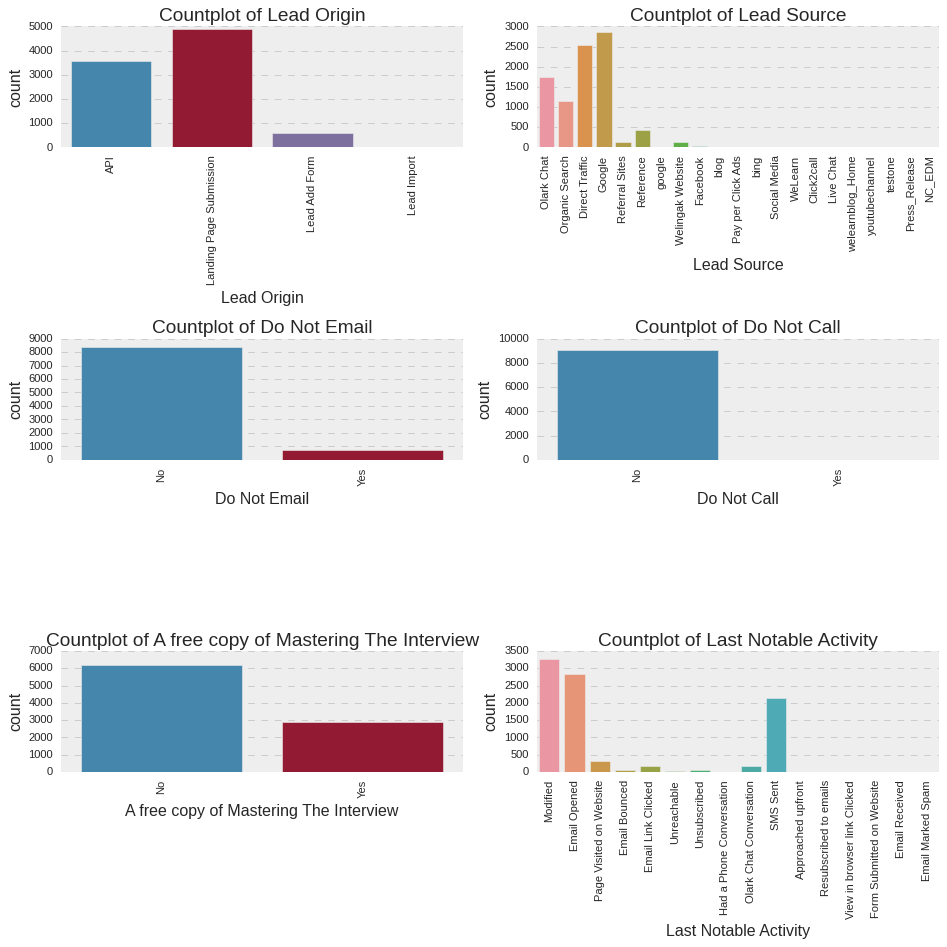

In [186]:
# Set the figure size and create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Loop through each column and create countplot in each subplot
for i, column in enumerate(cat):
    row = i // 2  # Calculate the row index
    col = i % 2  # Calculate the column index
    ax = axes[row, col]  # Get the corresponding subplot axes

    # Create the countplot
    sns.countplot(data=df2, x=column, ax=ax)

    # Set the title and rotate x-axis labels if needed
    ax.set_title(f'Countplot of {column}')
    ax.tick_params(axis='x', rotation=90)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the countplot grid
plt.show()

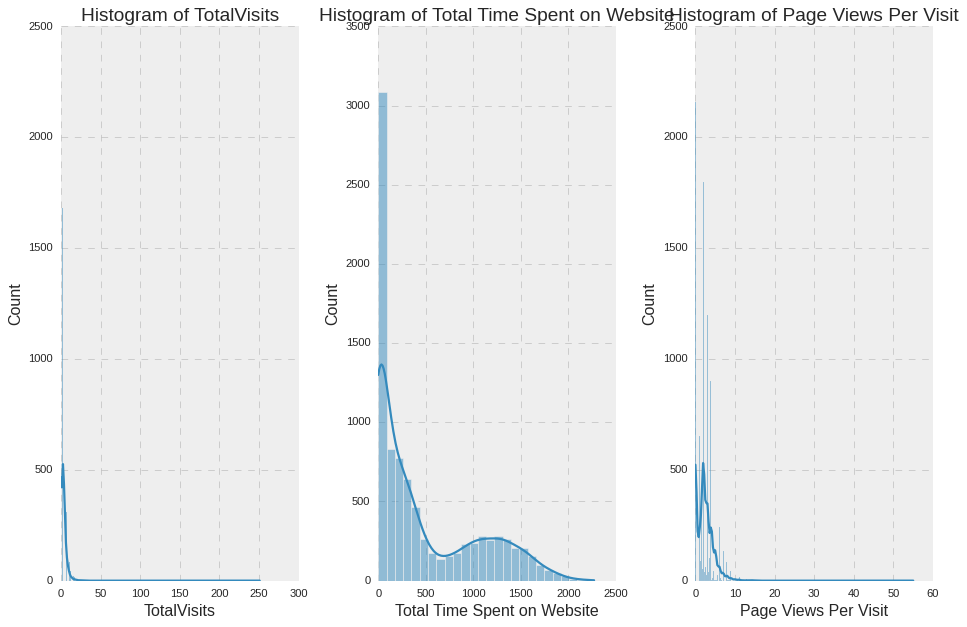

In [187]:
num_ = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
# Set the figure size and create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 8))

# Loop through each column and create histogram in each subplot
for i, column in enumerate(num_):
    
    ax = axes[i]  # Get the corresponding subplot axes

    # Create the histogram
    sns.histplot(data=df2, x=column, ax=ax, kde=True)

    # Set the title and labels
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the histogram grid
plt.show()

**Bivariate Analysis**

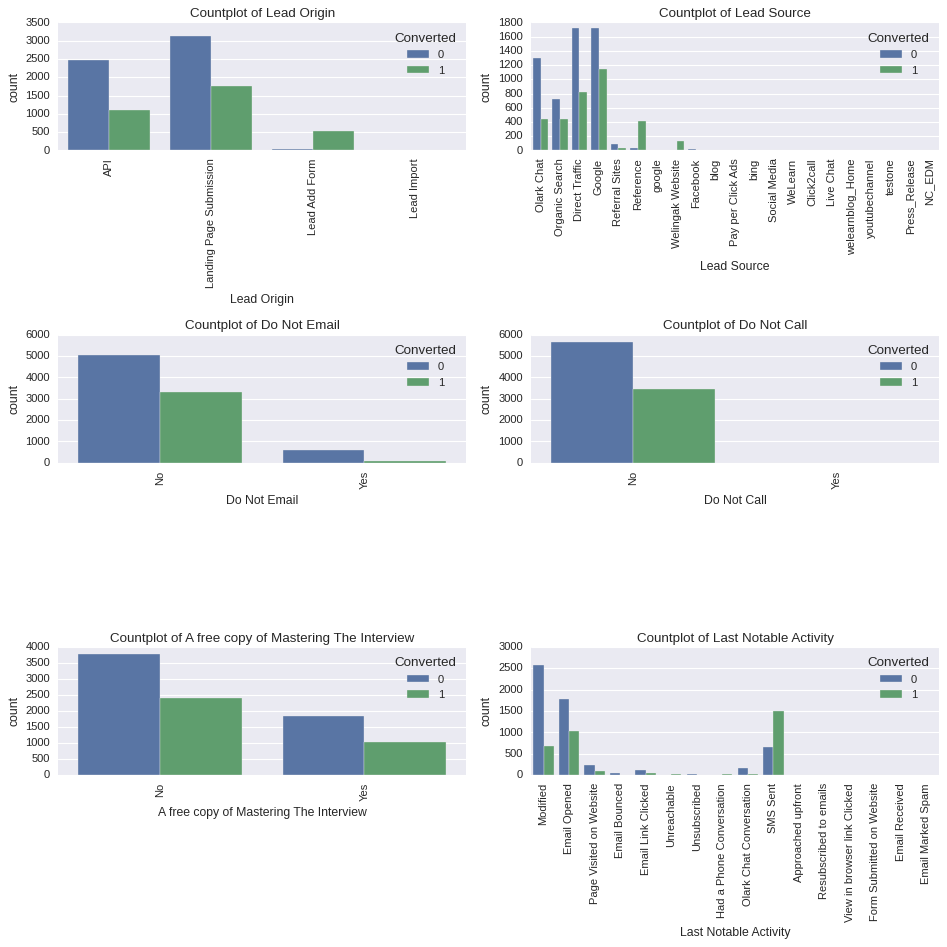

In [188]:
plt.style.use('seaborn') 

# Set the figure size and create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Loop through each column and create countplot in each subplot
for i, column in enumerate(cat):
    row = i // 2  # Calculate the row index
    col = i % 2  # Calculate the column index
    ax = axes[row, col]  # Get the corresponding subplot axes

    # Create the countplot
    sns.countplot(data=df2, x=column, ax=ax, hue= 'Converted')

    # Set the title and rotate x-axis labels if needed
    ax.set_title(f'Countplot of {column}')
    ax.tick_params(axis='x', rotation=90)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the countplot grid
plt.show()

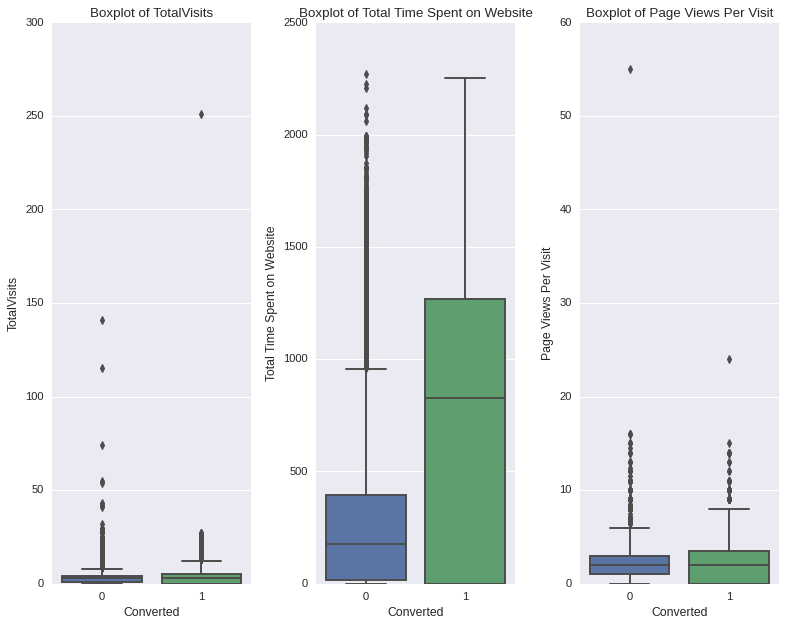

In [189]:
num_ = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Set the figure size and create subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 8))

# Loop through each column and create boxplot in each subplot
for i, column in enumerate(num_):
    ax = axes[i]  # Get the corresponding subplot axes

    # Create the boxplot
    sns.boxplot(data=df2, x='Converted', y=column, ax=ax)

    # Set the title and labels
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel('Converted')
    ax.set_ylabel(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the boxplot grid
plt.show()

In [190]:
# Lets remove outliers
# total visists >50 remove
df2= df2[~(df2['TotalVisits'] > 30)]
# page views per visit > 15 remove
df2 = df2[~(df2['Page Views Per Visit']> 10)]

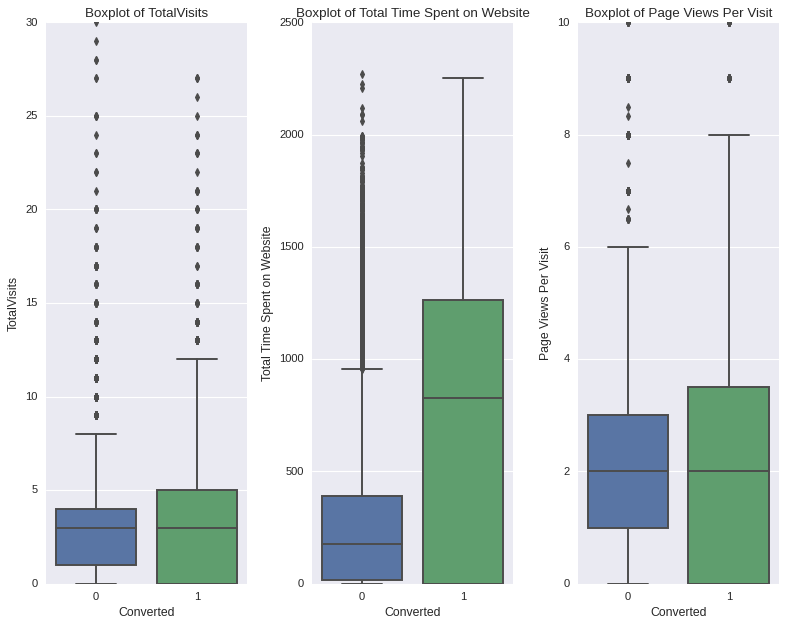

In [191]:
num_ = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Set the figure size and create subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 8))

# Loop through each column and create boxplot in each subplot
for i, column in enumerate(num_):
    ax = axes[i]  # Get the corresponding subplot axes

    # Create the boxplot
    sns.boxplot(data=df2, x='Converted', y=column, ax=ax)

    # Set the title and labels
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel('Converted')
    ax.set_ylabel(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the boxplot grid
plt.show()

<Axes: >

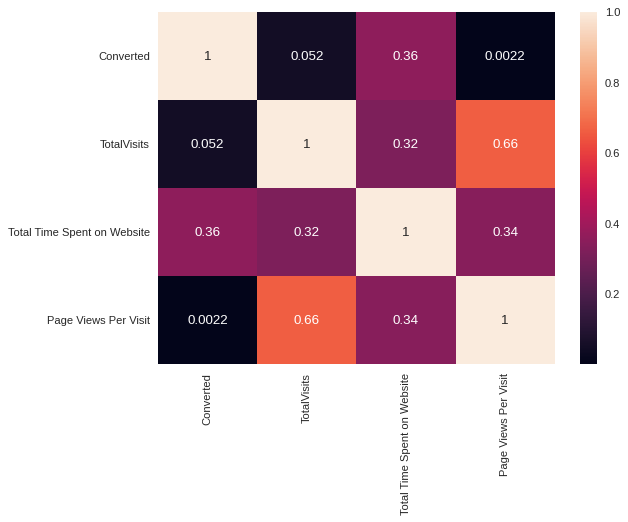

In [192]:
# Lets check the heatmap
sns.heatmap(df2.corr(), annot= True)

Creating dummy variables for categorical variables

In [193]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df2[cat], drop_first=True)

# Adding the results to the master dataframe
lead = pd.concat([df2, dummy1], axis=1)

In [194]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Yes,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [195]:
# drop original categorical columns
lead= lead.drop(['Lead Origin','Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'A free copy of Mastering The Interview','Last Notable Activity' ],axis=1)

In [196]:
lead.shape

(9016, 45)

<Axes: >

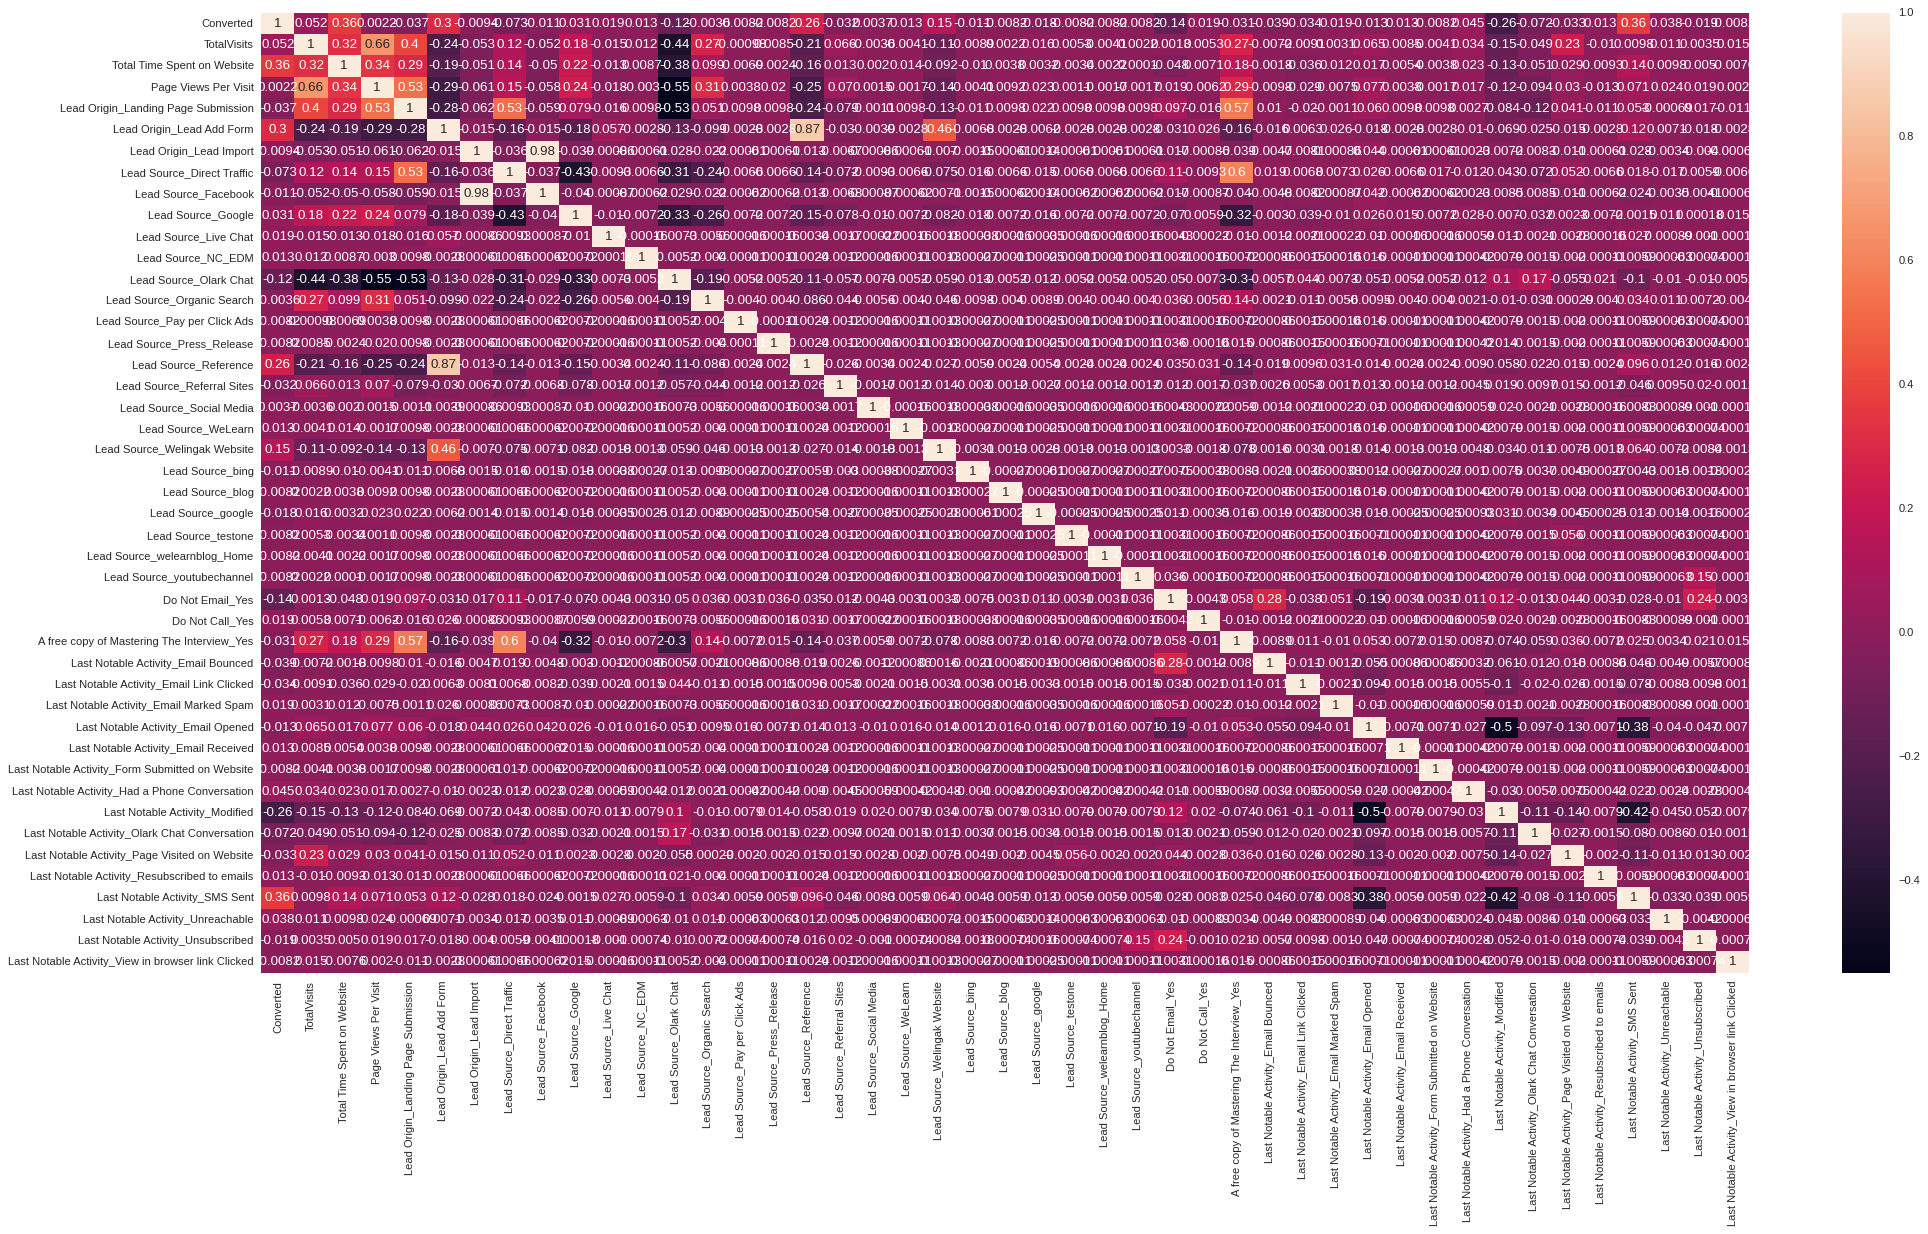

In [197]:
plt.figure(figsize=[30,15])
sns.heatmap(data= lead.corr(), annot= True)

In [198]:
# drop one of the columns who are more than 50% correlated with each other 
lead = lead.drop(['Page Views Per Visit','Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import','Lead Origin_Lead Add Form','A free copy of Mastering The Interview_Yes','Lead Source_Olark Chat'],1)

In [199]:
lead.corr()['Converted'].sort_values(ascending= False)

Converted                                             1.000000
Last Notable Activity_SMS Sent                        0.361113
Total Time Spent on Website                           0.359378
Lead Source_Reference                                 0.256212
Lead Source_Welingak Website                          0.150445
TotalVisits                                           0.051644
Last Notable Activity_Had a Phone Conversation        0.044698
Last Notable Activity_Unreachable                     0.037984
Lead Source_Google                                    0.031190
Lead Source_Live Chat                                 0.019076
Do Not Call_Yes                                       0.019076
Last Notable Activity_Email Marked Spam               0.019076
Lead Source_WeLearn                                   0.013488
Last Notable Activity_Resubscribed to emails          0.013488
Lead Source_NC_EDM                                    0.013488
Last Notable Activity_Email Received                  0

# Test train split and Model Building

In [200]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = lead['Converted']

X=lead.drop('Converted', axis=1)

In [201]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [202]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6827,4.0,1549,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6611,1.0,91,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4947,4.0,804,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9224,4.0,455,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5693,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [203]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6827,0.221931,1.980938,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6611,-0.700936,-0.712758,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4947,0.221931,0.604530,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9224,0.221931,-0.040258,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5693,-1.008558,-0.880883,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Feature selection using RFE

In [204]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [205]:
# select 15 features for rfe
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select= 15)             
rfe = rfe.fit(X_train, y_train)

In [206]:
rfe.support_

array([False,  True,  True, False,  True, False, False,  True, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
        True, False])

In [207]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 14),
 ('Total Time Spent on Website', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 20),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 2),
 ('Lead Source_NC_EDM', False, 13),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 11),
 ('Lead Source_Press_Release', False, 18),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 17),
 ('Lead Source_WeLearn', False, 16),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 5),
 ('Lead Source_blog', False, 6),
 ('Lead Source_google', False, 12),
 ('Lead Source_testone', False, 24),
 ('Lead Source_welearnblog_Home', False, 23),
 ('Lead Source_youtubechannel', False, 10),
 ('Do Not Email_Yes', True, 1),
 ('Do Not Call_Yes', False, 7),
 ('Last Notable Activity_Email Bounced', False, 19),
 ('Last Notable Activity_Email Link Clicked', False, 4),
 ('

In [208]:
col = X_train.columns[rfe.support_]

In [209]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Lead Source_Facebook', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do Not Call_Yes', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object')

In [210]:
import statsmodels.api as sm

Model 1

In [211]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6311
Model:                            GLM   Df Residuals:                     6295
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2843.9
Date:                Tue, 23 May 2023   Deviance:                       5687.7
Time:                        18:07:41   Pearson chi2:                 6.54e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3443
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

p-value of Last Notable Activity_Resubscribed to emails is more than 0.05 lets drop it

Model 2

In [212]:
col = col.drop('Last Notable Activity_Resubscribed to emails', 1)

In [213]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6311
Model:                            GLM   Df Residuals:                     6296
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2845.3
Date:                Tue, 23 May 2023   Deviance:                       5690.5
Time:                        18:07:41   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3440
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [214]:
# We can clearly see Lead Source_Welingak Website, Lead Source_Reference, Last Notable Activity_Had a Phone Conversation are
# Most to contribute to getting lead successfully convert
# Lets remove const as its p value is more than 0.05

In [215]:
X_train_sm = X_train_sm.drop('const', 1)

In [216]:
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6311
Model:                            GLM   Df Residuals:                     6297
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2846.1
Date:                Tue, 23 May 2023   Deviance:                       5692.3
Time:                        18:07:41   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3439
Covariance Type:            nonrobust                                         
                                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [217]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [218]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Notable Activity_Modified,1.64
2,Lead Source_Google,1.50
11,Last Notable Activity_SMS Sent,1.47
1,Lead Source_Direct Traffic,1.40
3,Lead Source_Organic Search,1.21
7,Do Not Email_Yes,1.20
0,Total Time Spent on Website,1.18
4,Lead Source_Reference,1.10
13,Last Notable Activity_Unsubscribed,1.08
6,Lead Source_Welingak Website,1.03


VIF is less than 5 so There is no MultiColinearity. Model 2 is perfect Model

Prediction on train set

In [219]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6827    0.634734
6611    0.074158
4947    0.735428
9224    0.147255
5693    0.267713
7920    0.139611
4740    0.497540
5816    0.141443
901     0.545940
7955    0.145974
dtype: float64

In [220]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.63473368, 0.07415774, 0.73542751, 0.14725528, 0.26771269,
       0.13961076, 0.49753993, 0.14144256, 0.54593955, 0.1459744 ])

In [221]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.634734,6827
1,0,0.074158,6611
2,1,0.735428,4947
3,0,0.147255,9224
4,0,0.267713,5693


In [222]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.634734,6827,1
1,0,0.074158,6611,0
2,1,0.735428,4947,1
3,0,0.147255,9224,0
4,0,0.267713,5693,0


In [223]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3460  483]
 [ 785 1583]]


In [224]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7990809697353827


In [225]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [226]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6684966216216216

In [227]:
# Let us calculate specificity
TN / float(TN+FP)

0.8775044382449911

In [228]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.12249556175500888


In [229]:
# positive predictive value 
print (TP / float(TP+FP))

0.7662149080348499


In [230]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8150765606595995


In [231]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [232]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

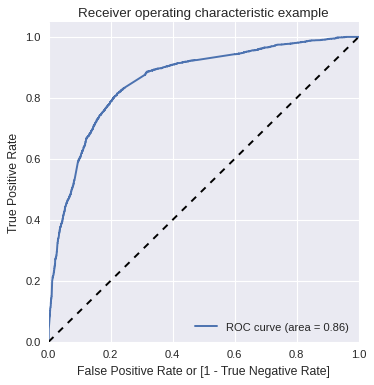

In [233]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [234]:
# area is 0.86 which is near 1, so it is good predictive model

# Finding Optimal Cutoff Point
Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [235]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.634734,6827,1,1,1,1,1,1,1,1,0,0,0
1,0,0.074158,6611,0,1,0,0,0,0,0,0,0,0,0
2,1,0.735428,4947,1,1,1,1,1,1,1,1,1,0,0
3,0,0.147255,9224,0,1,1,0,0,0,0,0,0,0,0
4,0,0.267713,5693,0,1,1,1,0,0,0,0,0,0,0


In [236]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375218  1.000000  0.000000
0.1   0.1  0.526066  0.974662  0.256657
0.2   0.2  0.733323  0.898226  0.634289
0.3   0.3  0.788148  0.821368  0.768197
0.4   0.4  0.798289  0.755490  0.823992
0.5   0.5  0.799081  0.668497  0.877504
0.6   0.6  0.771985  0.528716  0.918083
0.7   0.7  0.757408  0.443412  0.945980
0.8   0.8  0.735858  0.351351  0.966777
0.9   0.9  0.695294  0.209037  0.987319


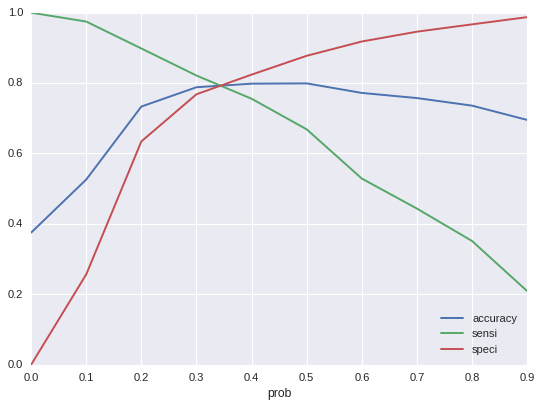

In [237]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [238]:
# From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [239]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.634734,6827,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.074158,6611,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.735428,4947,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.147255,9224,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.267713,5693,0,1,1,1,0,0,0,0,0,0,0,0


In [240]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.634734,6827,1,63
1,0,0.074158,6611,0,7
2,1,0.735428,4947,1,74
3,0,0.147255,9224,0,15
4,0,0.267713,5693,0,27


In [241]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7948027254000951

In [242]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3144,  799],
       [ 496, 1872]])

In [243]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [244]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7905405405405406

In [245]:
# Let us calculate specificity
TN / float(TN+FP)

0.7973624144052752

Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.87, which is very good. We have the following values for the Train Data:

Accuracy : 79.48%

Sensitivity : 79.07%

Specificity : 79.73%

In [246]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3144,  799],
       [ 496, 1872]])

In [247]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7008611007113441

In [248]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7905405405405406

In [249]:
from sklearn.metrics import precision_score, recall_score

In [250]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.7008611007113441

In [251]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7905405405405406

In [252]:
from sklearn.metrics import precision_recall_curve

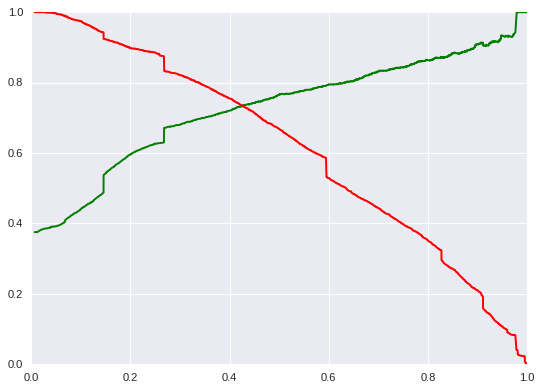

In [253]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Prediction on test set

In [254]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2810,0.174491,-0.117055,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8239,-0.110188,1.605465,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1757,0.174491,-0.212851,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5247,-0.394867,-0.695445,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4938,-0.394867,-0.834620,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [255]:
X_test = X_test[col]
X_test_sm = X_test

In [256]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2810    0.252797
8239    0.906560
1757    0.186763
5247    0.112142
4938    0.374011
8310    0.591696
8265    0.344889
736     0.566143
4404    0.067152
1838    0.153247
dtype: float64

In [257]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2810,0.252797
8239,0.906560
1757,0.186763
5247,0.112142
4938,0.374011


In [258]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [259]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,2810,0.252797
1,1,8239,0.906560
2,0,1757,0.186763
3,0,5247,0.112142
4,0,4938,0.374011


In [260]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,2810,0.252797
1,1,8239,0.906560
2,0,1757,0.186763
3,0,5247,0.112142
4,0,4938,0.374011


In [261]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,2810,0,0.252797,25
1,8239,1,0.906560,91
2,1757,0,0.186763,19
3,5247,0,0.112142,11
4,4938,0,0.374011,37


In [262]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,2810,0,0.252797,25,0
1,8239,1,0.906560,91,1
2,1757,0,0.186763,19,0
3,5247,0,0.112142,11,0
4,4938,0,0.374011,37,1


In [263]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7988909426987061

In [264]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1338,  320],
       [ 224,  823]])

In [265]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('sensitivity: ', TP / float(TP+FN))
# Let us calculate specificity
print('specificity: ', TN / float(TN+FP))

print('precision score: ', precision_score(y_pred_final.Converted , y_pred_final.final_Predicted))

print('recall score: ', recall_score(y_pred_final.Converted, y_pred_final.final_Predicted))

sensitivity:  0.7860553963705826
specificity:  0.8069963811821471
precision score:  0.7200349956255468
recall score:  0.7860553963705826


Final Observation:
Let us compare the values obtained for Train & Test:

Train Data: 

Accuracy : 79.48%

Sensitivity : 79.77%

Specificity : 79.73%

Test Data: 

Accuracy : 79.89%

Sensitivity : 78.60%

Specificity : 80.69%